# **Import Dependencies**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Collection**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Summer-2022-DM/Project-DM/Heart Disease Dataset.csv')
print(df)

     age sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63   M   3     145.0   233    1        0      150      0      2.3   
1     37   M   2     130.0   250    0        1      187      0      3.5   
2     41   F   1     130.0   204    0        0      172      0      1.4   
3     56   M   1     120.0   236    0        1      178      0      0.8   
4     57   F   0     120.0   354    0        1      163      1      0.6   
..   ...  ..  ..       ...   ...  ...      ...      ...    ...      ...   
298   57   F   0     140.0   241    0        1      123      1      0.2   
299   45   M   3     110.0   264    0        1      132      0      1.2   
300   68   M   0     144.0   193    1        1      141      0      3.4   
301   57   M   0     130.0   131    0        1      115      1      1.2   
302   57   F   1     130.0   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2     

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120.0,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,F,0,140.0,241,0,1,123,1,0.2,1,0,3,0
299,45,M,3,110.0,264,0,1,132,0,1.2,1,0,3,0
300,68,M,0,144.0,193,1,1,141,0,3.4,1,2,3,0
301,57,M,0,130.0,131,0,1,115,1,1.2,1,1,3,0
302,57,F,1,130.0,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,299.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.622074,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.625323,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


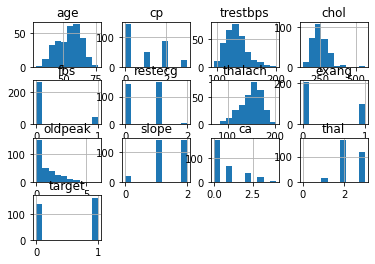

In [ ]:
df.hist()
plt.show()

# ***Data Preprocessing ***

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 33.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Missing Value Handling with median**

In [ ]:
df.trestbps

0      145.0
1      130.0
2      130.0
3      120.0
4      120.0
       ...  
298    140.0
299    110.0
300    144.0
301    130.0
302    130.0
Name: trestbps, Length: 303, dtype: float64

In [ ]:
tr=df.trestbps.median()
df.trestbps=df.trestbps.fillna(tr)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **One Hot Encoding**

In [ ]:
#convert column (sex) into catagorical
mf=pd.get_dummies(df['sex'])

In [ ]:
mf

,F,M
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
298,1,0
299,0,1
300,0,1
301,0,1


In [ ]:
#Concatation
conca=pd.concat([df,mf],axis='columns')

In [ ]:
conca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,F,M
0,63,M,3,145.0,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,M,2,130.0,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,F,1,130.0,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,M,1,120.0,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,F,0,120.0,354,0,1,163,1,0.6,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,0,140.0,241,0,1,123,1,0.2,1,0,3,0,1,0
299,45,M,3,110.0,264,0,1,132,0,1.2,1,0,3,0,0,1
300,68,M,0,144.0,193,1,1,141,0,3.4,1,2,3,0,0,1
301,57,M,0,130.0,131,0,1,115,1,1.2,1,1,3,0,0,1


In [ ]:
final=conca.drop(['sex'],axis='columns')

In [ ]:
final

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,F,M
0,63,3,145.0,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130.0,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130.0,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120.0,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120.0,354,0,1,163,1,0.6,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241,0,1,123,1,0.2,1,0,3,0,1,0
299,45,3,110.0,264,0,1,132,0,1.2,1,0,3,0,0,1
300,68,0,144.0,193,1,1,141,0,3.4,1,2,3,0,0,1
301,57,0,130.0,131,0,1,115,1,1.2,1,1,3,0,0,1


In [ ]:
final['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# **Splitting the Features and Target**

In [ ]:
x=final.drop(['target'],axis=1)
y=final['target']

In [ ]:
x

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,F,M
0,63,3,145.0,233,1,0,150,0,2.3,0,0,1,0,1
1,37,2,130.0,250,0,1,187,0,3.5,0,0,2,0,1
2,41,1,130.0,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,120.0,236,0,1,178,0,0.8,2,0,2,0,1
4,57,0,120.0,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241,0,1,123,1,0.2,1,0,3,1,0
299,45,3,110.0,264,0,1,132,0,1.2,1,0,3,0,1
300,68,0,144.0,193,1,1,141,0,3.4,1,2,3,0,1
301,57,0,130.0,131,0,1,115,1,1.2,1,1,3,0,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# **Splitting the Data into Training data & Test Data**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x.shape, xtrain.shape, xtest.shape)

(303, 14) (242, 14) (61, 14)


# **Model Training**

# **Linear Regression**

In [ ]:
reg=LinearRegression()

**Fit(Train)**

In [ ]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# accuracy on training data
reg.predict(xtest)

array([ 0.06912711,  0.71973961,  0.74001051,  0.01202584,  0.23562401,
        0.51936528,  0.18258916,  0.26814895, -0.18435787, -0.23945422,
        0.65351986,  0.89942933,  0.10780085,  0.76217466,  0.99331019,
        0.62079055,  0.17095158,  0.6506469 , -0.14801515,  0.75651682,
        0.72366766,  0.4516595 ,  0.24993328,  0.2403105 ,  0.80070546,
        0.58222617,  0.31803977,  0.48301954,  1.06187434,  0.60713436,
        0.62103032, -0.05554442,  1.00501967,  0.66217374,  0.86573825,
        0.57867724,  0.07189789,  0.77542314,  0.18084906,  0.31512004,
        0.66902731,  0.73661842,  0.42623735,  0.18632125,  0.51907504,
        0.64732709,  0.75005188,  0.59643809,  0.13917548,  0.73656606,
        0.78203289,  0.56641279,  1.00127435,  0.77334386,  1.25086983,
        0.24789552,  0.93397989,  0.87714505,  0.6924126 ,  0.9538948 ,
        0.71565219])

In [ ]:
reg.score(xtest,ytest)

0.46855431348361265

In [ ]:
reg.coef_

array([-0.0010663 ,  0.10445638, -0.0016219 , -0.00037524, -0.0450051 ,
        0.0145901 ,  0.00295059, -0.1571327 , -0.06506737,  0.03008606,
       -0.11837359, -0.09322639,  0.11370052, -0.11370052])

In [ ]:
reg.intercept_

0.7805100005722619

# **Logistic Regression**

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# accuracy on training data
xtrain_pred = log.predict(xtrain)
training_data_accuracy = accuracy_score(xtrain_pred, ytrain)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8347107438016529


In [ ]:
# accuracy on test data
xtest_pred = log.predict(xtest)
test_data_accuracy = accuracy_score(xtest_pred, ytest)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8524590163934426


# **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
pred2=dt.predict(xtest)
pred2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
dt.score(xtest,ytest)

0.7377049180327869

In [ ]:
accuracy_score(ytest,pred2)

0.7377049180327869

In [ ]:
confusion_matrix(ytest,pred2)

array([[21,  6],
       [10, 24]])

In [ ]:
classification_report(ytest,pred2)

'              precision    recall  f1-score   support\n\n           0       0.68      0.78      0.72        27\n           1       0.80      0.71      0.75        34\n\n    accuracy                           0.74        61\n   macro avg       0.74      0.74      0.74        61\nweighted avg       0.75      0.74      0.74        61\n'

In [ ]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.80      0.71      0.75        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



# **Random Forest**

In [ ]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [ ]:
predrf = rf.predict(xtest)
rf.score(xtest,ytest)

0.8524590163934426

In [ ]:
predrf

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(ytest,predrf)

0.8524590163934426

In [ ]:
confusion_matrix(ytest,predrf)

array([[22,  5],
       [ 4, 30]])

In [ ]:
classification_report(ytest,predrf)

'              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83        27\n           1       0.86      0.88      0.87        34\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [ ]:
print(classification_report(ytest,predrf))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# **Building a Predictive System**

In [ ]:
input_data = (55,1,165.0,283,0,1,147,1,3.7,0,1,0,0,1)

In [ ]:
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

In [ ]:
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = log.predict(input_data_reshaped)
print(prediction)


[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease
